#   Project P15

##  Analyze by visualizing data

In [81]:
# how many survived, how many died ?


df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)


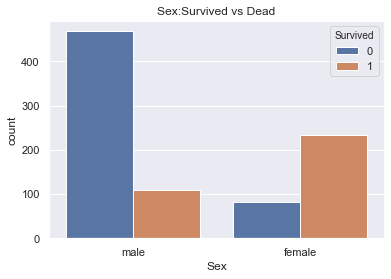

In [115]:
#Confirms Assumptions #1

sns.countplot('Sex',hue='Survived',data=df).set_title('Sex:Survived vs Dead')
plt.show()


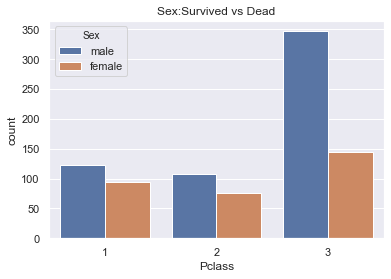

In [57]:
sns.countplot('Pclass',hue='Sex',data=df).set_title('Sex:Survived vs Dead')
plt.show()

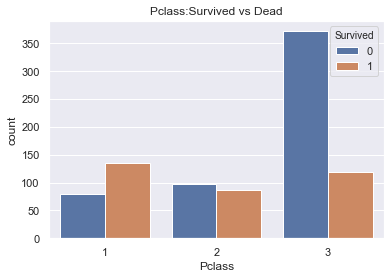

In [117]:
#Confirms Assumptions #3

sns.countplot('Pclass',hue='Survived',data=df).set_title('Pclass:Survived vs Dead')
plt.show()

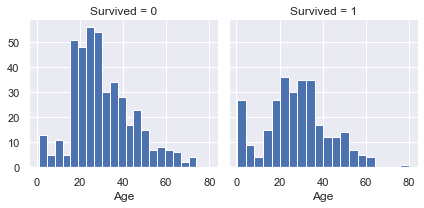

In [33]:
#Survivability by Age

g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

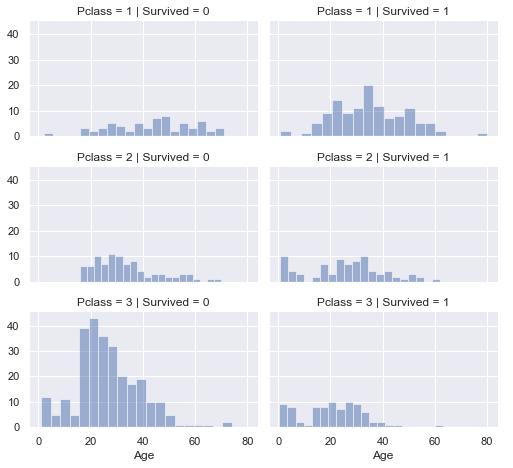

In [39]:
#Survivability by Age and Pclass

grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

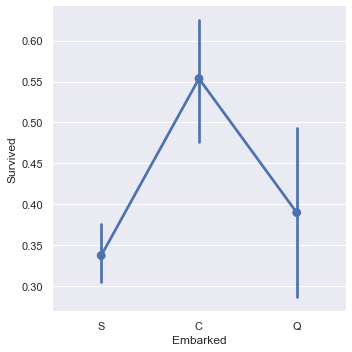

In [69]:
#Embarked : Survival rate lowest for S and highest for C

sns.catplot('Embarked','Survived', kind='point', data=df);


In [80]:
#Titanic DashBoard


from jupyter_dash import JupyterDash

import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd


external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)


colors = {
    'background': '#111111',
    
    'text': '#407294'
}


df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_3_Python/data/titanic.csv')

#labels
lab = df["Survived"].value_counts().keys().tolist()
#values
val = df["Survived"].value_counts().values.tolist()

labPclass = df["Pclass"].value_counts().keys().tolist()


fig_pie = px.pie(df, values=val, names=lab,color=lab, title='Rate of Survivability')

fig_barSex = px.bar(df, x="Sex", y="Survived",color='Sex', barmode="group",title='Survivability by Sex')

fig_barPclass = px.bar(df, x="Pclass", y='Survived',color='Pclass', barmode="group", title='Survivability by Pclass')

fig_HistAge = px.histogram(df,  x="Age",y="Survived",color_discrete_sequence=['RosyBrown'],title='Survivability by Age')


fig_scatEmba=px.scatter(x =df['Age'],y=df['Fare'], size=df["Pclass"], color=df["Survived"],log_x=True, size_max=20, title='Fare vs Age with Survivability and Pclass')

fig_scatEmba.update_xaxes(title='Age') 

fig_scatEmba.update_yaxes(title='Fare') 

fig_pie.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)


fig_barSex.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)


fig_barPclass.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)




fig_HistAge.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)

fig_scatEmba.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)

app.layout = html.Div(style={'backgroundColor': colors['background']},children=[

    html.Div([html.H1(children='Titanic Dashboard',
                             style={
            'textAlign': 'center',
            'color': "white",
             "size": "150%"
        }
                     ),
        html.Div([
            

            html.Div(children='''
            '''),

            dcc.Graph(
                id='graph1',
                    style={
 "width": "125%"
},
                figure=fig_pie
            ),  
        ], className='three columns'),
        html.Div([
            

            html.Div(children='''
               
            '''),

            dcc.Graph(
                id='graph2',
                style={
 "width": "120%"
},
                figure=fig_barSex 
            ),  
        ], className='four columns'),
              
        html.Div([
            
            html.Div(children='''
               
            '''),

            dcc.Graph(
                id='graph3',
                style={
 "width": "135%"
},
                figure=fig_barPclass 
            ),  
        ], className='four columns'),      
              
              
    ], className='row'),
    # New Div for all elements in the new 'row' of the page
    html.Div([

        html.Div(children='''
           
        '''),

        dcc.Graph(
            id='graph4',
                    style={
 "width": "140%"
},
            figure=fig_HistAge
        ),  
    ], className='five columns'),
    html.Div([

        html.Div(children='''
           
        '''),

        dcc.Graph(
            id='graph5',
                    style={
 "width": "140%"
},
            figure=fig_scatEmba
        ),  
    ], className='five columns')
    
    
   
])

if __name__ == '__main__':
    app.run_server(mode='external', port=8060)
  


Dash app running on http://127.0.0.1:8060/
